### Calculate correlation in wind profile among OWPs in module

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv("../EMPIRE_extension/EMPIRE_input/windoffshore.csv")
df

,time,BE,DE,DK,FI,FR,GB,IE,NL,NO,...,VVC,VVD,SRVF,SRVB,NAVB,NAVA,NAVD,NAVC,VVE,SRVD
0,01/01/2015 00:00,0.5116,0.7030,0.5928,0.5852,0.5899,0.7529,0.6691,0.5175,0.8284,...,0.990578,0.999767,0.999769,0.999809,0.999792,0.999809,0.036156,0.108841,0.999788,0.999809
1,01/01/2015 01:00,0.5036,0.6875,0.5769,0.5895,0.5705,0.7395,0.7031,0.5190,0.8531,...,0.999766,0.999770,0.999794,0.999809,0.984819,0.999779,0.000000,0.044868,0.999799,0.999809
2,01/01/2015 02:00,0.5238,0.6535,0.6154,0.5084,0.5279,0.7465,0.7375,0.5396,0.8746,...,0.999783,0.999798,0.999809,0.999809,0.738507,0.999768,0.000000,0.001861,0.999792,0.999809
3,01/01/2015 03:00,0.5404,0.6803,0.6354,0.4204,0.5033,0.7479,0.7178,0.5460,0.9074,...,0.999781,0.999804,0.999809,0.999809,0.484476,0.966576,0.000000,0.000000,0.999804,0.999809
4,01/01/2015 04:00,0.5181,0.7272,0.6622,0.3652,0.5250,0.7340,0.7119,0.5385,0.9420,...,0.999807,0.999809,0.999809,0.999809,0.293473,0.711988,0.061455,0.000000,0.999809,0.999809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,31/12/2019 19:00,0.3553,0.0627,0.3277,0.6192,0.4522,0.3507,0.0428,0.0735,0.5534,...,0.994421,0.873503,0.215321,0.247384,0.515774,0.788339,0.318274,0.000000,0.595597,0.124753
43820,31/12/2019 20:00,0.3692,0.0493,0.2974,0.6115,0.4493,0.3581,0.0845,0.0794,0.6203,...,0.999776,0.824044,0.263830,0.270437,0.444876,0.810298,0.268048,0.000749,0.595842,0.140528
43821,31/12/2019 21:00,0.3326,0.0437,0.3009,0.5861,0.4829,0.3483,0.1077,0.0859,0.6819,...,0.999768,0.863697,0.276728,0.373095,0.397604,0.766816,0.229016,0.002564,0.554006,0.203281
43822,31/12/2019 22:00,0.2794,0.0495,0.3397,0.5549,0.5207,0.3278,0.0969,0.0933,0.7540,...,0.999769,0.978837,0.267222,0.571758,0.397051,0.692031,0.213431,0.000666,0.789336,0.319079


Map from area codes to full name

In [28]:
MAPPING = {"MF": "MorayFirth", "FF": "FirthofForth",
            "DB": "DoggerBank", "HS": "Hornsea", "OD": "OuterDowsing",
            "NF": "Norfolk", "EA": "EastAnglia", "BS": "Borssele",
            "HK": "HollandseeKust", "HB": "HelgoländerBucht", "NS": "Nordsøen",
            'NVEA': 'NordvestA', 'NVEC': 'NordvestC',
            'VVA': 'VestavindA', 'SNVA': 'SønnavindA', 'SRVC': 'SørvestC',
            'NVEB': 'NordvestB', 'VVF': 'VestavindF', 'SRVE': 'SørvestE',
            'SRVA': 'SørvestA', 'VVB': 'VestavindB', 'VVC': 'VestavindC',
            'VVD': 'VestavindD', 'SRVF': 'SørvestF', 'SRVB': 'SørvestB',
            'NAVB': 'NordavindB', 'NAVA': 'NordavindA', 'NAVD': 'NordavindD', 
            'NAVC': 'NordavindC', 'VVE': 'VestavindE', 'SRVD': 'SørvestD'}

# Drop non-NS areas
drop_cols = []
for col in df.columns:
    if col not in MAPPING.keys():
        drop_cols.append(col)
df = df[df.columns.difference(drop_cols)]

# Rename cols
df = df.rename(columns=MAPPING)
df

,Borssele,DoggerBank,EastAnglia,FirthofForth,HelgoländerBucht,HollandseeKust,Hornsea,MorayFirth,NordavindA,NordavindB,...,SørvestC,SørvestD,SørvestE,SørvestF,VestavindA,VestavindB,VestavindC,VestavindD,VestavindE,VestavindF
0,0.82222,0.96628,0.83877,0.97155,0.89444,0.80266,0.93758,0.91862,0.999809,0.999792,...,0.999800,0.999809,0.999768,0.999769,0.999787,0.995175,0.990578,0.999767,0.999788,0.999767
1,0.81267,0.96952,0.83901,0.96699,0.88875,0.80292,0.94551,0.91736,0.999779,0.984819,...,0.999809,0.999809,0.999779,0.999794,0.999790,0.999768,0.999766,0.999770,0.999799,0.999769
2,0.83310,0.96597,0.85387,0.95394,0.86615,0.82459,0.93747,0.93329,0.999768,0.738507,...,0.999809,0.999809,0.999799,0.999809,0.999808,0.999787,0.999783,0.999798,0.999792,0.999768
3,0.84184,0.95541,0.85469,0.94042,0.87388,0.83591,0.92666,0.95544,0.966576,0.484476,...,0.999809,0.999809,0.999809,0.999809,0.999809,0.999783,0.999781,0.999804,0.999804,0.999769
4,0.82080,0.93488,0.84037,0.94325,0.90262,0.82446,0.93262,0.96055,0.711988,0.293473,...,0.999809,0.999809,0.999809,0.999809,0.999809,0.999809,0.999807,0.999809,0.999809,0.999802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,0.52500,0.15600,0.69700,0.54600,0.12100,0.25800,0.24200,0.51900,0.788339,0.515774,...,0.259419,0.124753,0.398874,0.215321,0.999809,0.999778,0.994421,0.873503,0.595597,0.501926
43820,0.52600,0.25400,0.70000,0.56700,0.09500,0.26400,0.29100,0.53400,0.810298,0.444876,...,0.250017,0.140528,0.404260,0.263830,0.999809,0.999769,0.999776,0.824044,0.595842,0.505980
43821,0.49800,0.34400,0.68200,0.57000,0.08500,0.26700,0.33800,0.54700,0.766816,0.397604,...,0.242357,0.203281,0.353203,0.276728,0.999809,0.999776,0.999768,0.863697,0.554006,0.527675
43822,0.46700,0.42200,0.64700,0.55400,0.10300,0.27700,0.38600,0.56500,0.692031,0.397051,...,0.323001,0.319079,0.325363,0.267222,0.999809,0.999809,0.999769,0.978837,0.789336,0.666701


Plot correlation

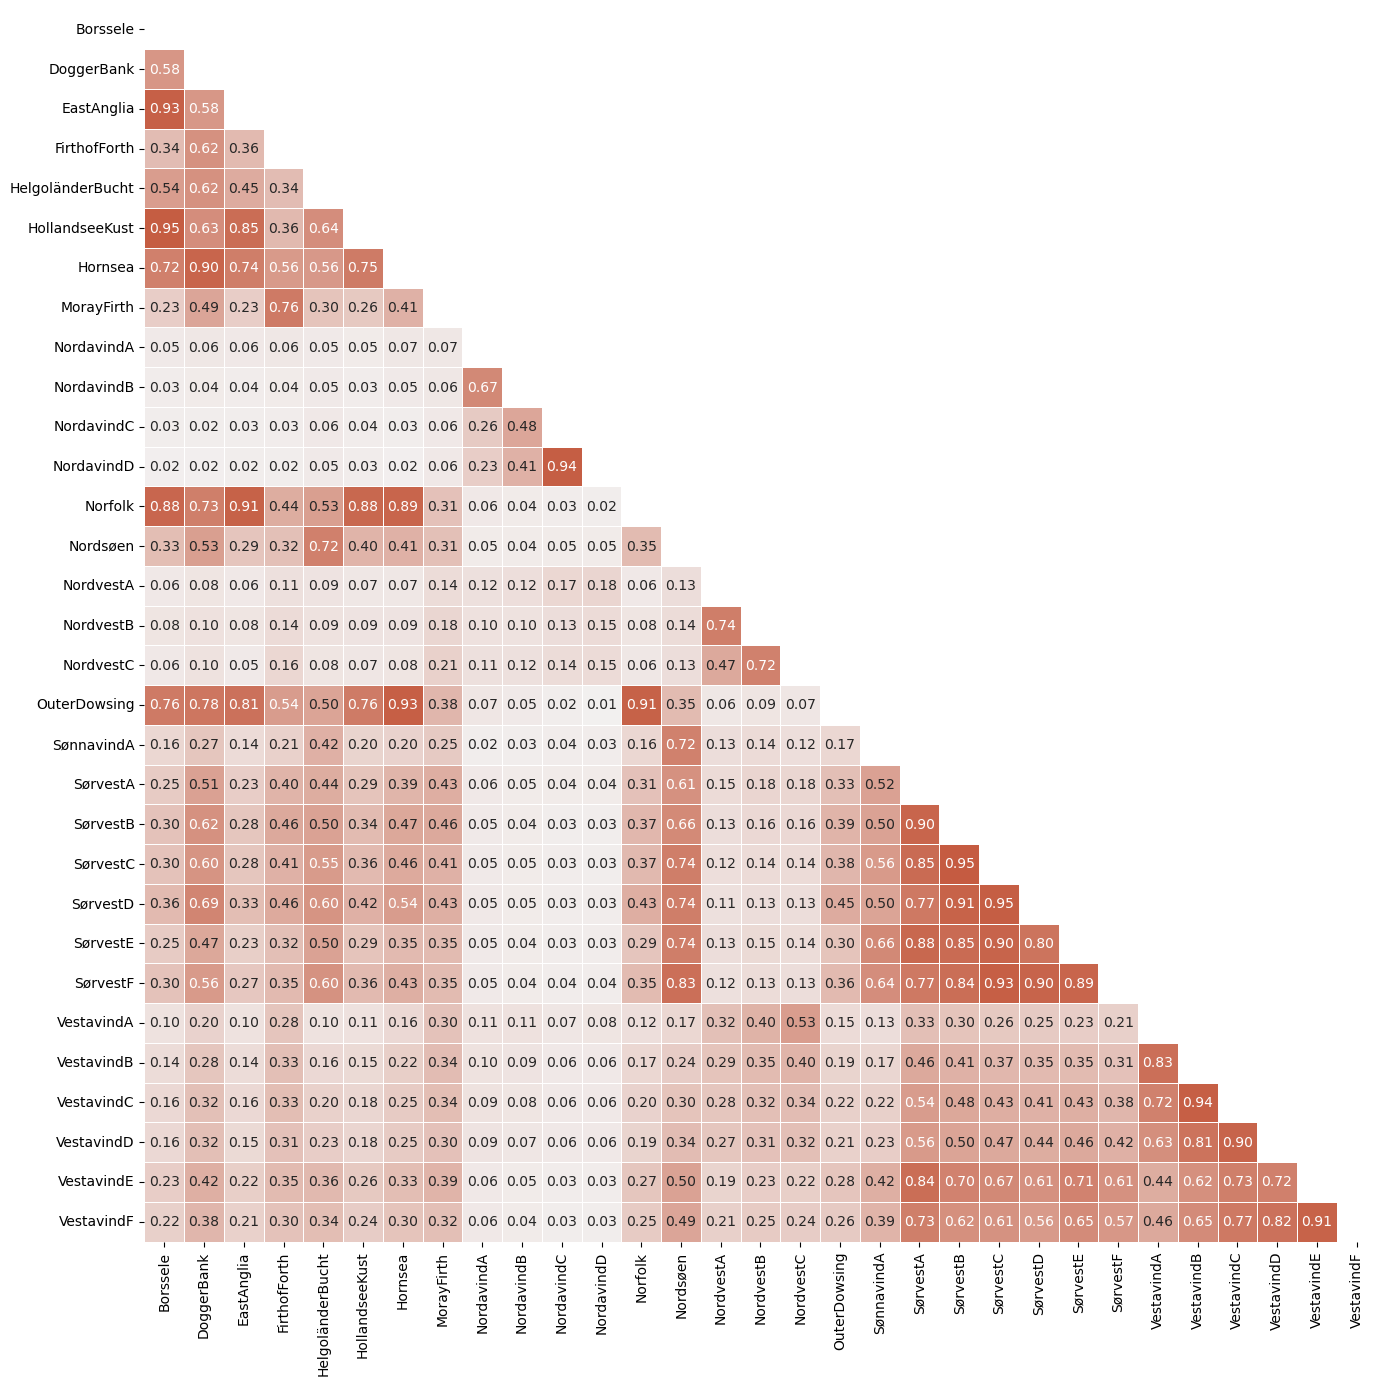

In [35]:
# Compute the correlation matrix
corr = df.corr(numeric_only=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 16))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1.0, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 10}, cbar=False, fmt='.2f')

plt.savefig("SavedFigs/correlation", bbox_inches='tight')